# 스클이와 마클이의 선형회귀

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
scle = [-400, 7000] # y = -400x + 7000
macle = [-420, 6000] #y = -420x + 6000

data = [[3, 5580], [5, 2984], [7, 2446], [9, 2906]] # [month, search_volume] 

x = [i[0] for i in data]
y = [i[1] for i in data]

In [18]:
def func(a, b, x):
  return (a * x + b)

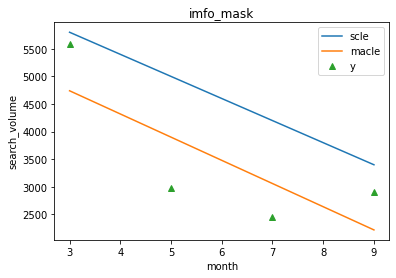

In [51]:
plt.plot(x, [func(scle[0], scle[1], i) for i in x])
plt.plot(x, [func(macle[0], macle[1], i) for i in x])
plt.plot(x, y, '^')
plt.xlabel('month')
plt.ylabel('search_volume')
plt.title('imfo_mask')
plt.legend(['scle', 'macle', 'y'])
plt.show()

In [5]:
def mse(y, y_hat):
  return ((y - y_hat) ** 2).mean()

def mse_val(y, predict_result):
  return mse(np.array(y), np.array(predict_result))

In [40]:
def test_result(a, b, x):
  predict_result = []

  for i in range(len(x)):
    predict_result.append(func(a, b, x[i]))
    print('{}월 검색량 = {}, 예상 검색량 = {}'.format(x[i], y[i], func(a, b, x[i])))
  return predict_result


In [54]:
print('scle')
y_scle = test_result(scle[0], scle[1], x) 
print('\nmacle')
y_macle = test_result(macle[0], macle[1], x)
print()


scle
3월 검색량 = 5580, 예상 검색량 = 5800
5월 검색량 = 2984, 예상 검색량 = 5000
7월 검색량 = 2446, 예상 검색량 = 4200
9월 검색량 = 2906, 예상 검색량 = 3400

macle
3월 검색량 = 5580, 예상 검색량 = 4740
5월 검색량 = 2984, 예상 검색량 = 3900
7월 검색량 = 2446, 예상 검색량 = 3060
9월 검색량 = 2906, 예상 검색량 = 2220



In [78]:
print('scle', '{}'.format(mse_val(y, y_scle)))
print(y_scle)
print('macle', '{}'.format(mse_val(y, y_macle)))
print(y_macle)


scle 1858302.0
[5800, 5000, 4200, 3400]
macle 598062.0
[4740, 3900, 3060, 2220]


In [100]:
mx = np.mean(x)
my = np.mean(y_macle)


divisor = sum([(i - mx)**2 for i in x])
#dividend = sum(list(((x[i] - mx) * (y_macle[i] - my)) for i in range(len(x))))
def top(x, mx, y, my):
  d = 0
  for i in range(len(x)):
    d += (x[i] - mx) * (y[i] - my)
  return d

dividend = top(x, mx, y, my)

print('분자:', dividend)
print('분모:',divisor)


분자: -8560.0
분모: 20.0


In [90]:
a = dividend / divisor
b = my - mx * a

print('y = %.fx + %.f' %(a, b)) #function of optimizer

y = -428x + 6048


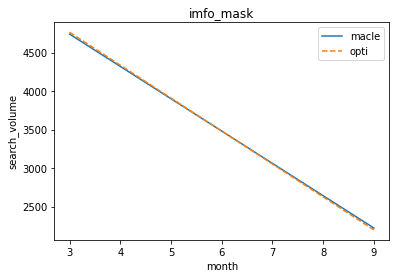

In [96]:


plt.plot(x, [func(macle[0], macle[1], i) for i in x]) #macle
plt.plot(x, [func(a, b, i) for i in x], '--') #optimizer
plt.xlabel('month')
plt.ylabel('search_volume')
plt.title('imfo_mask')
plt.legend(['macle', 'opti'])
plt.show()
                    